In [1]:
#import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from IPython.display import display, Image
import csv
import glob
from linreg_nn import *
from sketch_dec import SketchRNNDecoder
from draw_utils import plot_stroke

In [2]:
sketch_vec = "owl_z.csv"    #shape 100,128
photo_vec = "photo_z.csv"   # shape 100,7,7,160
photo_dir = "/home/kelvin/OgataLab/sketch-wmultiple-tags/rendered_256x256/256x256/photo/tx_000000000000/owl/"
MODEL_DIR = "./linreg_log/test7"
# MODEL_DIR = "./linreg_log/test4"#log for pseudo inverse training

inputs, targets = get_csv_dataset()
test_in = inputs[-5:]
test_tar = targets[-5:]
inp,targ = test_in, test_tar

In [3]:
#load photos
img_n = list(range(1,101))
img_arr = []
for i in range(len(img_n)):
    img_arr.append(photo_dir+str(img_n[i])+'.jpg')
tar_p = img_arr[-5:]
# print(tar_p)
# for i in range(len(tar_p)):
#     display(Image(filename=tar_p[i]))

In [4]:
#function to show images horizontally
def HoriImages(img_array):
    fig = plt.figure()
    file_no = len(img_array)
    for i in range(file_no):
        a=fig.add_subplot(1,file_no,i+1)
        image = plt.imread(img_array[i])
        plt.imshow(image)
        plt.axis('off')

In [5]:
#load predictions from linear model
my_feature_columns = [tf.feature_column.numeric_column(
        key="x",
        shape=[7 * 7 * 160]
    )]    

my_config = tf.estimator.RunConfig(model_dir=MODEL_DIR)

# create a linear regression model
model = tf.estimator.Estimator(
        model_fn=linreg_fn,
        params={
            'feature_columns': my_feature_columns,
        },
        config=my_config
    )

pred_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'x': inp},
        y=targ,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_epochs=1
    )
preds = model.predict(input_fn=pred_input_fn)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f09094e31d0>, '_model_dir': './linreg_log/test7', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_save_summary_steps': 100, '_num_ps_replicas': 0}


In [6]:
#call decoder
decoder = SketchRNNDecoder("/tmp/sketch_rnn/models/owl/lstm_test/")

INFO:tensorflow:Model using cpu.
INFO:tensorflow:Input dropout mode = 0.
INFO:tensorflow:Output dropout mode = 0.
INFO:tensorflow:Recurrent dropout mode = 0.
INFO:tensorflow:Loading model /tmp/sketch_rnn/models/owl/lstm_test/vector.
INFO:tensorflow:Restoring parameters from /tmp/sketch_rnn/models/owl/lstm_test/vector


In [7]:
#place vectors into list
stroke_t = []
stroke_p = []
for i in range(len(targ)):
    stroke_t.append(decoder.draw_from_z(np.expand_dims(targ[i],0)))
for pred in preds:
    stroke_p.append(decoder.draw_from_z(np.expand_dims(pred['sketch_vector'],0)))

INFO:tensorflow:Restoring parameters from ./linreg_log/test7/model.ckpt-100000


In [8]:
#Reconstruction display definition
def reconst(row, col, strokes):
    fig = plt.figure()
    gs = gridspec.GridSpec(row, col)
    c=0
    for i in range(row):
        for j in range(col):
            ax = fig.add_subplot(gs[i, j])
            plot_stroke(ax, strokes[c])
            c+=1
    plt.show()

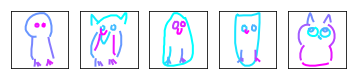

In [9]:
#Reconstruction results from targets
# for i in range(len(stroke_t)):
#     ax = plt.subplot(111)
#     plot_stroke(ax,stroke_t[i])
#     plt.show()
reconst(1,5,stroke_t)

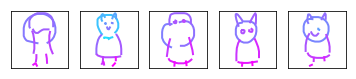

In [10]:
#Reconstruction results from predictions
reconst(1,5,stroke_p)

In [11]:
HoriImages(tar_p)
print("Untrained Photo targets")
# fig = plt.figure()

Untrained Photo targets


Reconstruction from targets


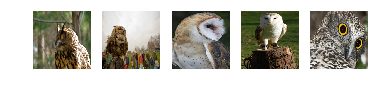

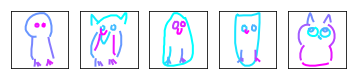

Reconstruction from predictions


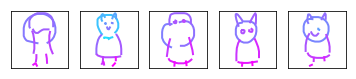

In [12]:
print("Reconstruction from targets")
reconst(1,5,stroke_t)
print("Reconstruction from predictions")
reconst(1,5,stroke_p)